In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
columns = df.columns 
for column in columns:
    print(f"Column:{column}\n{df[column].value_counts()}")
    print(f"Nulls:{df[column].isnull().sum()}")
    print(f"naN:{df[column].isna().sum()}\n")

Column:N
22     44
40     44
27     42
39     41
31     41
       ..
127     2
46      1
135     1
130     1
139     1
Name: N, Length: 137, dtype: int64
Nulls:0
naN:0

Column:P
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: P, Length: 117, dtype: int64
Nulls:0
naN:0

Column:K
17    90
22    87
15    86
20    80
25    78
      ..
81     8
83     8
13     7
7      5
80     4
Name: K, Length: 73, dtype: int64
Nulls:0
naN:0

Column:temperature
30.015926    1
27.559065    1
28.504164    1
19.020613    1
28.674088    1
            ..
22.566642    1
27.601955    1
17.828037    1
26.185524    1
28.386865    1
Name: temperature, Length: 2200, dtype: int64
Nulls:0
naN:0

Column:humidity
24.969699    1
18.728320    1
56.673691    1
68.498360    1
92.707851    1
            ..
83.147963    1
52.627415    1
63.646983    1
67.663238    1
83.346882    1
Name: humidity, Length: 2200, dtype: int64
Nulls:0
naN:0

Column:ph
6.430010    1
6.377427

In [6]:
df.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

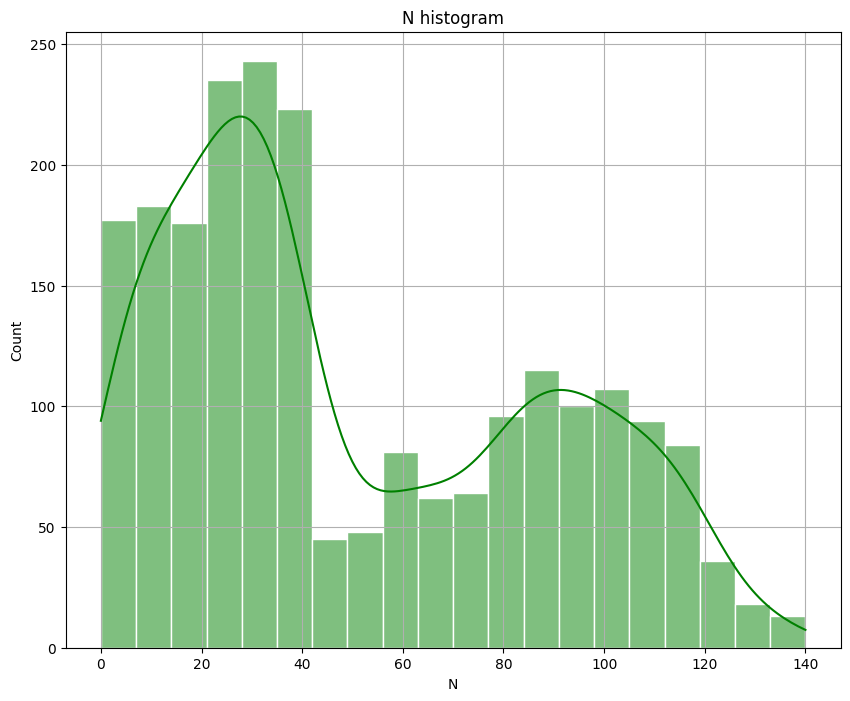

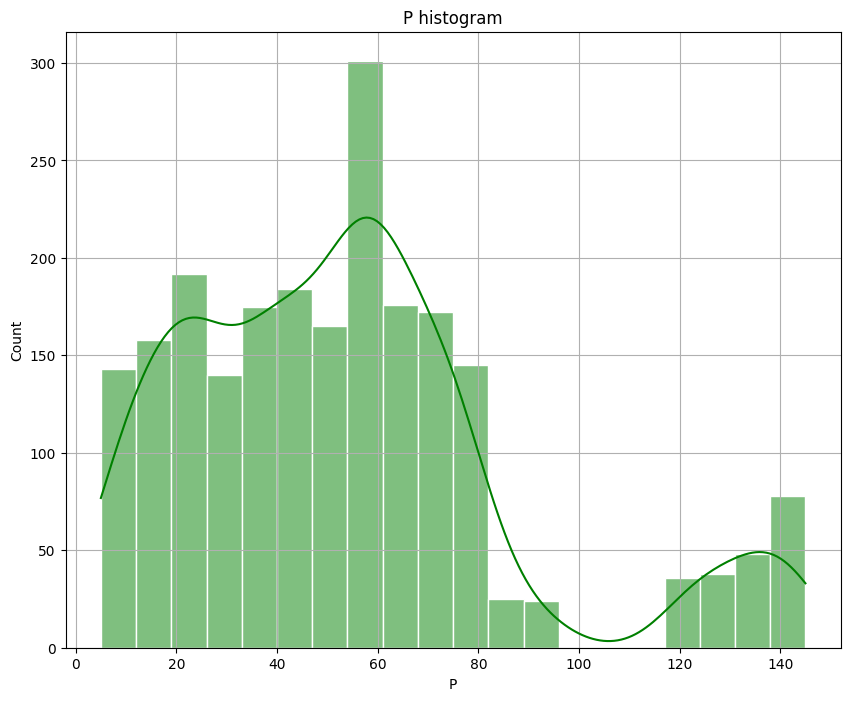

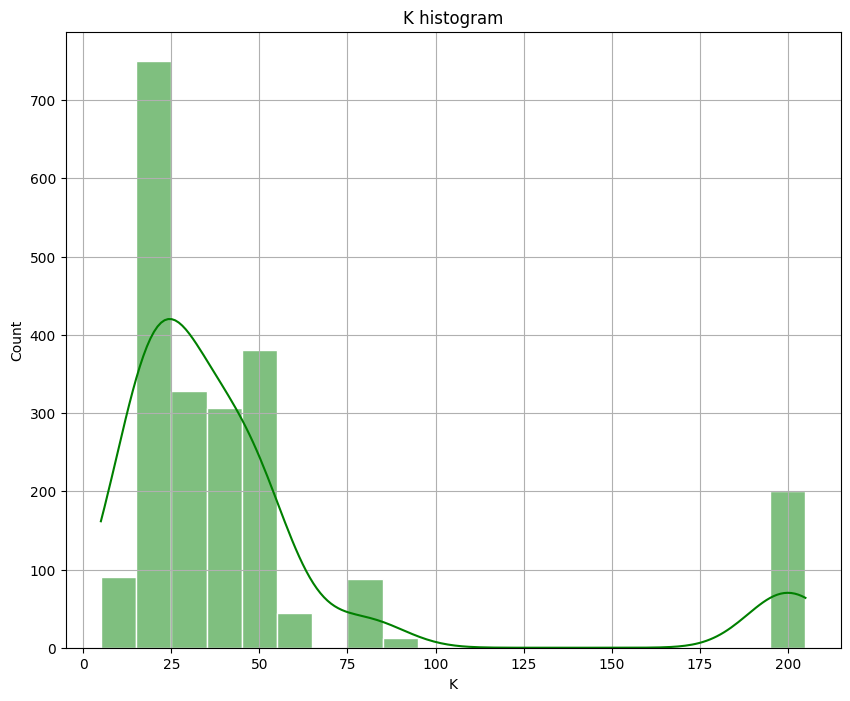

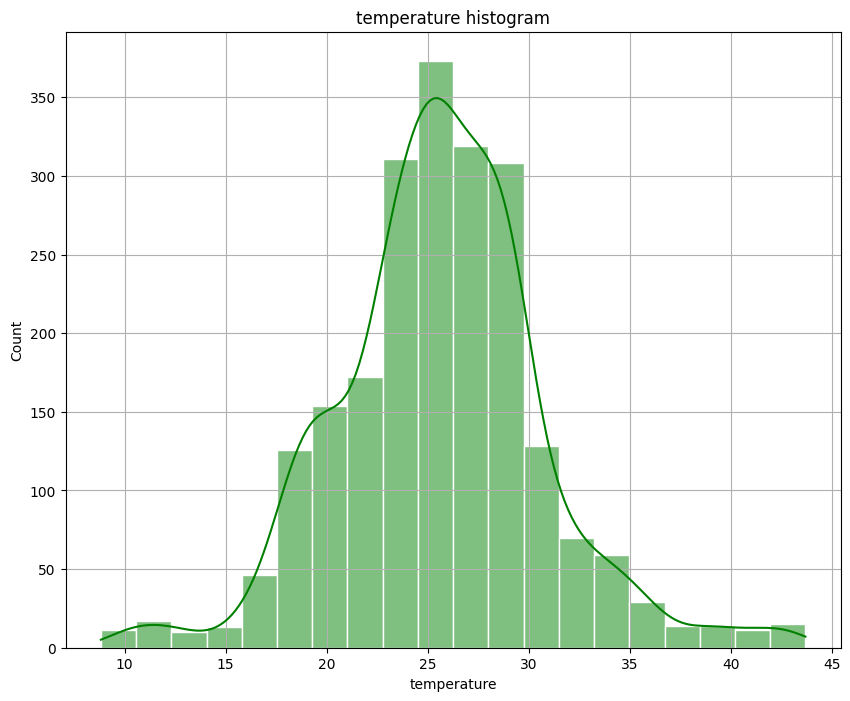

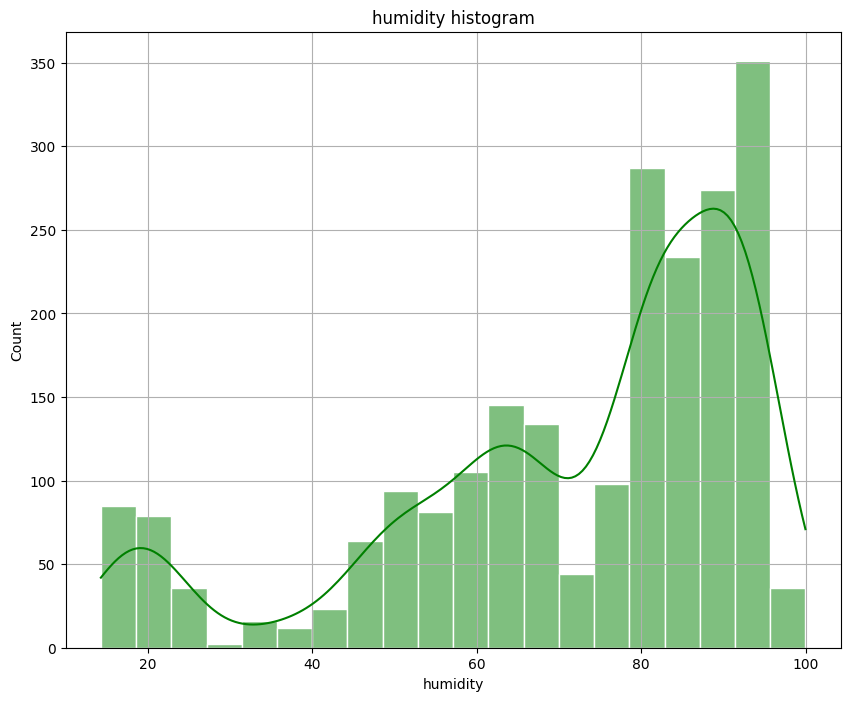

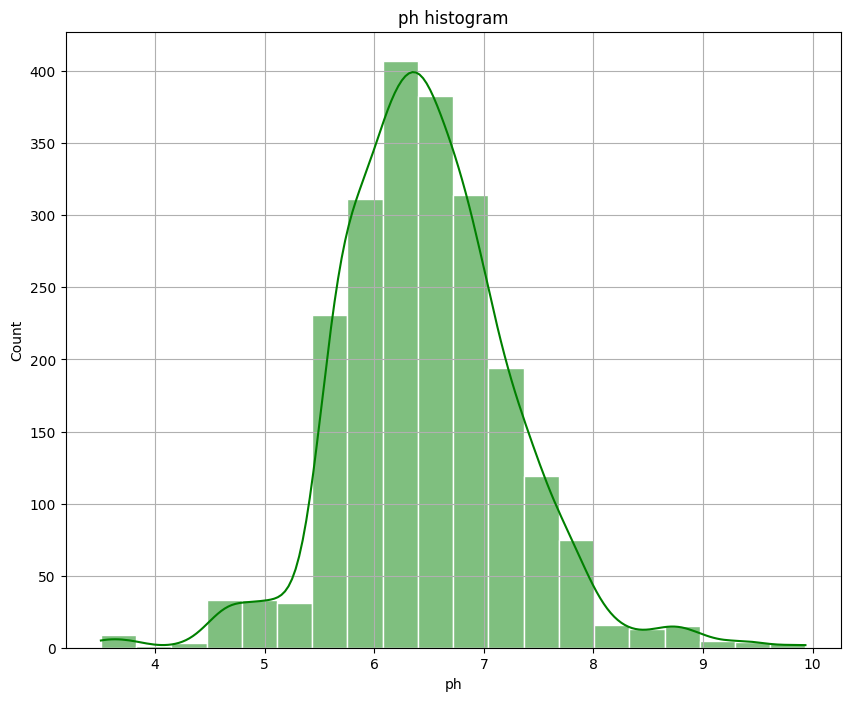

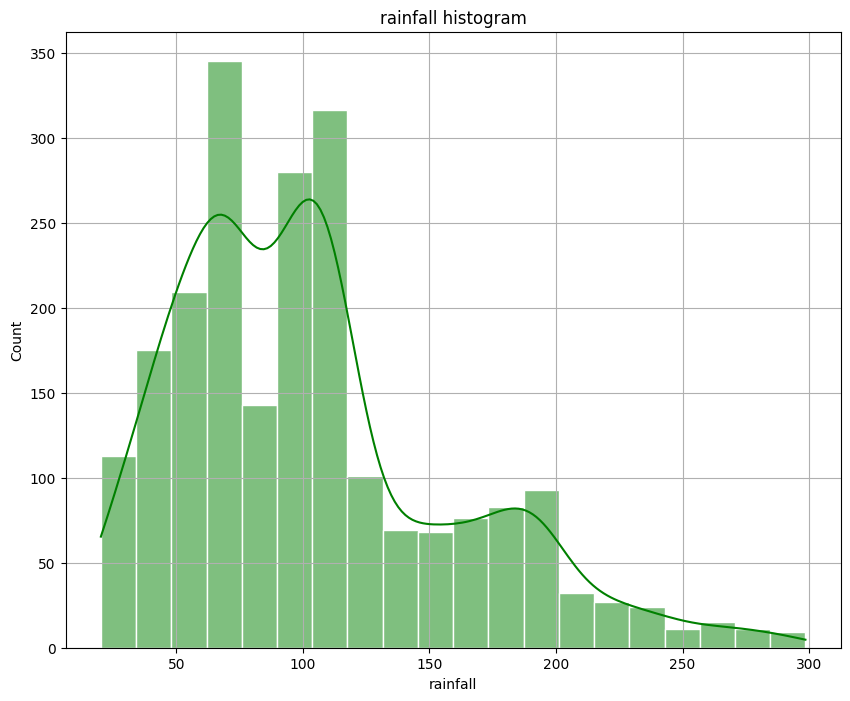

In [13]:
df_without_label = df.drop(['label'],axis=1)
columns = df_without_label.columns 
for column in columns:
    plt.figure(figsize=(10,8))
    sns.histplot(df[column],bins=20,kde=True,color='green',edgecolor='white')
    plt.title(f"{column} histogram")
    plt.grid(True)
    plt.show()

In [16]:
X = df.drop(['label'],axis=1)
y = df['label']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(f"Classification report:\n {classification_report(y_test,y_pred)}")

Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   